# CREDIT CARD ATTRITION RATE PREDICTION


# MACHINE LEARNING CAPESTONE PROJECT

Introduction
A churn model is a mathematical representation of how churn impacts your business. Churn calculations are built on existing data (the number of creditcard customers who left your service during a given time period). A predictive churn model extrapolates on this data to show future potential churn rates.

Churn (aka customer attrition) is a scourge on subscription businesses. When your revenue is based on recurring monthly or annual contracts, every customer who leaves puts a dent in your cash flow. High retention rates are vital for your survival. So what if we told you there was a way to predict, at least to some degree, how and when your customers will cancel?

Building a predictive churn model helps you make proactive changes to your retention efforts that drive down churn rates. Understanding how churn impacts your current revenue goals and making predictions about how to manage those issues in the future also helps you stem the flow of churned customers. If you don’t take action against your churn now, any company growth you experience simply won’t be sustainable.

Comprehensive customer profiles help you see what types of customers are canceling their accounts. Now it’s time to figure out how and why they’re churning. Ask yourself the following questions to learn more about the pain points in your product and customer experience that lead to a customer deciding to churn.

A business manager of a consumer credit card bank is facing the problem of credit card customer  attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.



Clientum: represents the unique IDs of customers. It is formed by a unique sequence of 9 digits. There is a total of 10,127 unique customers in the datasets.

Attrition_Flag: this target/output variable represents the current status of customers. It has two unique values: one is Existing Customer (current customer) and Attrited Customer (churned customer).

Customer_Age: this variable consist of the age of customers. The age range of customers is between 27 and 73.
Gender: this variable is coded as F for Female and M for Male.

Dependent_count: this variable represents the number of dependents associated with a customer.

Education_Level: this variable represents the educational qualification of a customer. It consist of 7 unique values which are High School, Graduate, Uneducated, College, Post-graduate, Doctorate and Unknown. The Unknown group has 1519 customers.

Marital_Status: this variable represents the marital status of customers. It has 4 unique values which are Married, Single, Unknown, Divorced. The Unknown group has 749 customers.

Income_Category: this variable represents the annual income category of card holder: Less than $40K, $40k-$60K, $60K-$80K, $80K-120K, $120+, Unknown. The Unknown group has 1112 customer in this category.

Card_Category: this is a product variable that represents the credit card type. It has 4 unique values - Blue, Gold, Silver and Platinum.

Months_on_book: represents the number of months (period) the account holder has been a customer in the bank.

Total_Relationship_Count: represents the number of products held by the customer.

Months_Inactive_12_mon: this is the number of months a customer has been inactive in the last 12 months (1 year).

Contacts_Count_12_mon: this is the number of times a customer has made contact with the bank.

Credit_Limit: this is the credit limit on the credit card owned by customer.

Total_Revolving_Bal: represents total revolving balance on the credit card.

Avg_Open_To_Buy: represents the average Open to Buy Credit Line for last 12 months.

Total_Amt_Chng_Q4_Q1: represents the change in transaction amount from Q4 over Q1.

Total_Trans_Amt: represents the total transaction amount in the last 12 months.

Total_Trans_Ct: represents the total transaction count in the last 12 months.

Total_Ct_Chng_Q4_Q1: represents the change in transaction count from Q4 over Q1.

Avg_Utilization_Ratio: represents the average card utilization ratio.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy
import statsmodels
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\imvv44\\Desktop\\capstone project\\credit_card_churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
data.shape

(10127, 21)

In [5]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
data.CLIENTNUM

0        768805383
1        818770008
2        713982108
3        769911858
4        709106358
           ...    
10122    772366833
10123    710638233
10124    716506083
10125    717406983
10126    714337233
Name: CLIENTNUM, Length: 10127, dtype: int64

In [7]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
data.drop('CLIENTNUM',inplace=True,axis=1)#id is of no use

In [10]:
data.dtypes.index

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
## selecting all categorical variable columns
categorical_columns = data.dtypes[data.dtypes == 'object'].index
print(categorical_columns)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


In [12]:
## selecting all Numericalvariable columns
Numerical_columns = data.dtypes[data.dtypes == 'int64'].index
print(Numerical_columns)

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')


In [13]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [14]:
data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [15]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [16]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [17]:
data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [18]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [19]:
le=LabelEncoder()

In [20]:
data.Attrition_Flag=le.fit_transform(data.Attrition_Flag)
data.Gender=le.fit_transform(data.Gender)
data.Education_Level=le.fit_transform(data.Education_Level)
data.Marital_Status=le.fit_transform(data.Marital_Status)
data.Income_Category=le.fit_transform(data.Income_Category)
data.Card_Category=le.fit_transform(data.Card_Category)

# Attrition_Flag

Target Variable

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

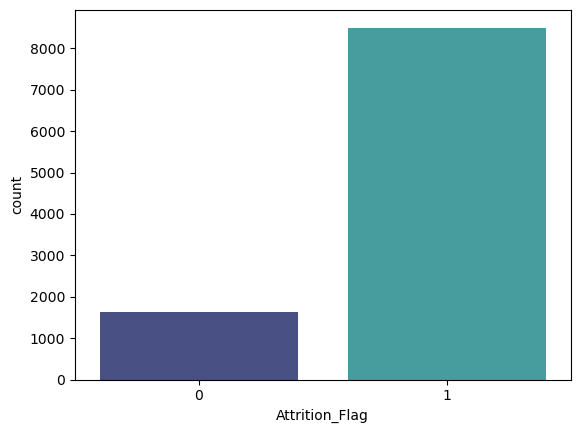

In [21]:
sns.countplot(data.Attrition_Flag,palette='mako')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [23]:
x = data.drop("Attrition_Flag",axis = 1)
y = data["Attrition_Flag"]

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20, stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
p_x=lr.predict(xtest)

In [27]:
base_model_logistic_regression=accuracy_score(ytest,p_x)
base_model_logistic_regression

0.8759460348798948

# Customer_Age

In [28]:
data1=data.copy()

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

data1.Customer_Age.value_counts()

In [30]:
data1.Customer_Age.nunique()

45

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

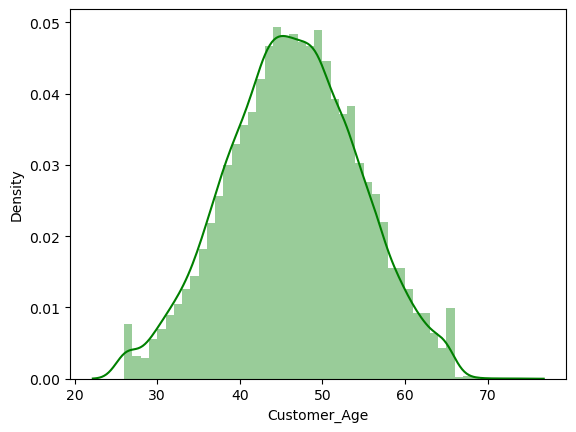

In [31]:
sns.distplot(data.Customer_Age,color='g')

<AxesSubplot:xlabel='Customer_Age'>

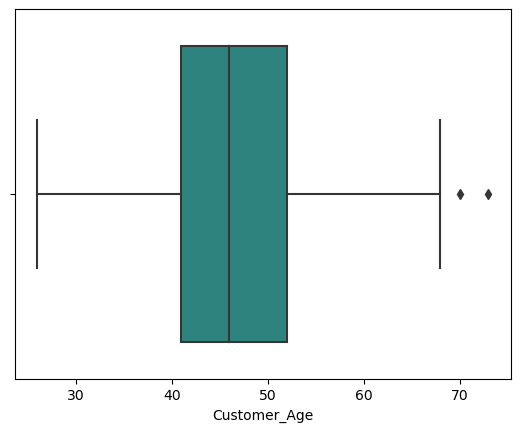

In [32]:
sns.boxplot(data1.Customer_Age,palette='viridis')

In [33]:
Q1= data1.Customer_Age.quantile(0.25)
Q2= data1.Customer_Age.quantile(0.50)
Q3= data1.Customer_Age.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data1.Customer_Age[(data1.Customer_Age<lowerend) | (data1.Customer_Age > upperend)]
len(data1.Customer_Age[data1.Customer_Age> upperend])

2

<AxesSubplot:xlabel='Customer_Age'>

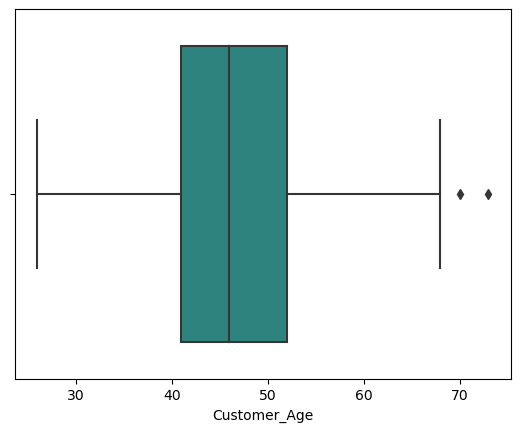

In [34]:
sns.boxplot(data1.Customer_Age,palette='viridis')

In [35]:
model = ols("Customer_Age~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df        sum_sq    mean_sq        F   PR(>F)
Attrition_Flag      1.0     215.64237  215.64237  3.35607  0.06699
Residual        10125.0  650575.36267   64.25436      NaN      NaN


In [36]:
data1.drop('Customer_Age',axis=1,inplace=True)#because p-value is greater than 0.05

# Dependent_count

In [37]:
data1.Dependent_count.value_counts()#ordnal

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

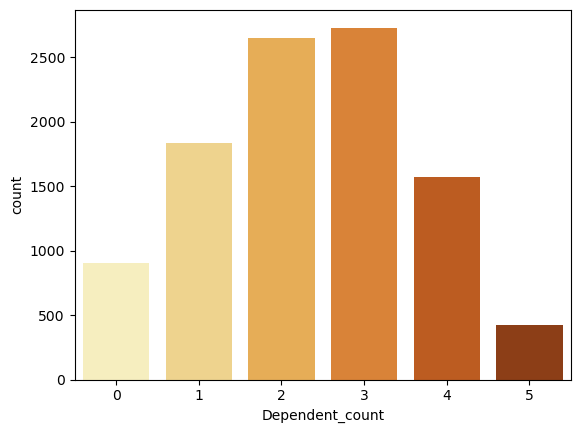

In [38]:
sns.countplot(data1.Dependent_count,palette='YlOrBr')

In [39]:
pd.crosstab(data1.Attrition_Flag, data1.Dependent_count, margins = True)

Dependent_count,0,1,2,3,4,5,All
Attrition_Flag,,,,,,,
0,135,269,417,482,260,64,1627
1,769,1569,2238,2250,1314,360,8500
All,904,1838,2655,2732,1574,424,10127


In [40]:
data_dept_ct= np.array([[135,269,417,482,260,64],[769,1569,2238,2250,1314,360]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(9.476429774498301,
 0.09150463456682643,
 5,
 array([[ 145.236299  ,  295.29238669,  426.55129851,  438.92208946,
          252.87824627,   68.11968006],
        [ 758.763701  , 1542.70761331, 2228.44870149, 2293.07791054,
         1321.12175373,  355.88031994]]))

In [41]:
data1.drop('Dependent_count',axis=1,inplace=True)#because p-value is greater than 0.05

# Months_on_book

In [42]:
data1.Months_on_book.value_counts()

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

<AxesSubplot:xlabel='Months_on_book', ylabel='count'>

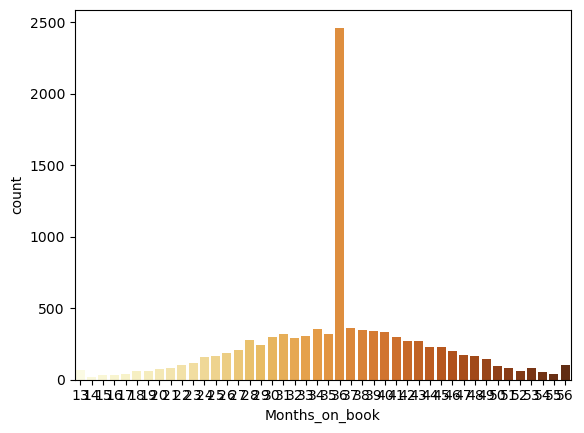

In [43]:
sns.countplot(data1.Months_on_book,palette='YlOrBr')

<AxesSubplot:xlabel='Months_on_book'>

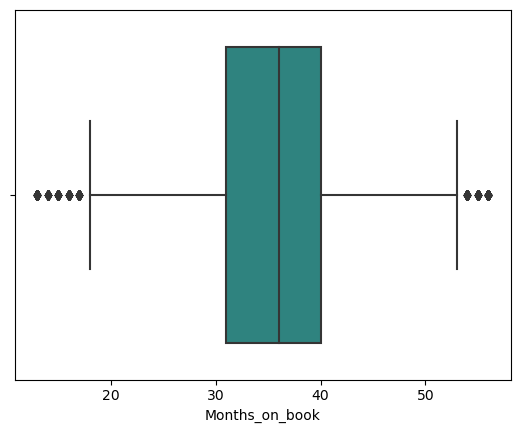

In [44]:
sns.boxplot(data1.Months_on_book,palette='viridis')

In [45]:
Q1= data1.Months_on_book.quantile(0.25)
Q2= data1.Months_on_book.quantile(0.50)
Q3= data1.Months_on_book.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)
dfdia_outliers = data1.Months_on_book[(data1.Months_on_book<lowerend) | (data1.Months_on_book > upperend)]
len(data1.Months_on_book[data1.Months_on_book> upperend])


198

In [46]:
data1.Months_on_book = np.where(data1.Months_on_book >upperend ,upperend,data1.Months_on_book)
data1.Months_on_book= np.where(data1.Months_on_book<lowerend ,lowerend,data1.Months_on_book )

<AxesSubplot:xlabel='Months_on_book'>

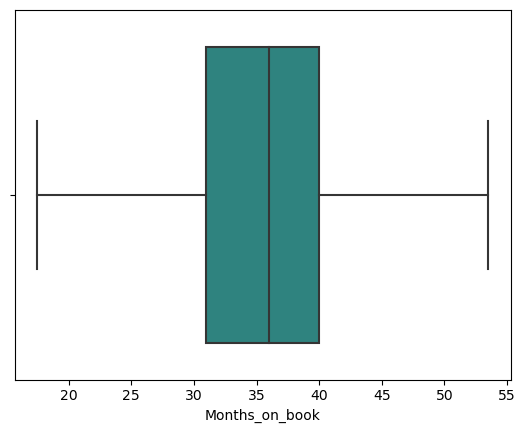

In [47]:
sns.boxplot(data1.Months_on_book,palette='viridis')

In [48]:
model = ols("Months_on_book~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df        sum_sq    mean_sq        F   PR(>F)
Attrition_Flag      1.0     112.14848  112.14848  1.85608  0.17311
Residual        10125.0  611774.15412   60.42214      NaN      NaN


In [49]:
data1.drop('Months_on_book',axis=1,inplace=True)#because p-value is greater than 0.05

# Months_Inactive_12_mon

In [50]:
data1.Months_Inactive_12_mon.value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

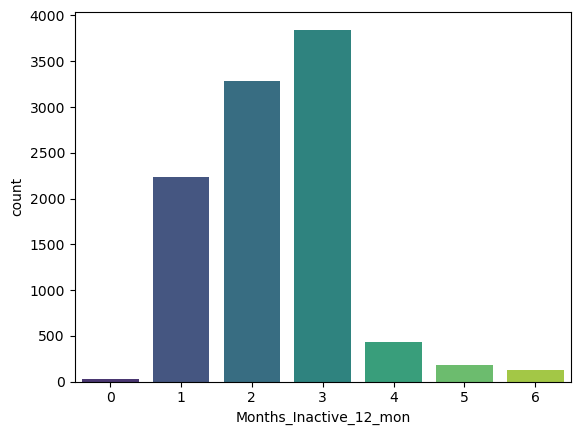

In [51]:
sns.countplot(data1.Months_Inactive_12_mon,palette='viridis')

In [52]:
pd.crosstab(data1.Attrition_Flag, data1.Months_Inactive_12_mon, margins = True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Attrition_Flag,,,,,,,,
0,15,100,505,826,130,32,19,1627
1,14,2133,2777,3020,305,146,105,8500
All,29,2233,3282,3846,435,178,124,10127


In [53]:
data_dept_ct= np.array([[15,100,505,826,130,51],[14,2133,2777,3020,305,251]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(396.07416558087414,
 2.0814051891581185e-83,
 5,
 array([[   4.65912906,  358.75293769,  527.284882  ,  617.89690925,
           69.88693591,   48.51920608],
        [  24.34087094, 1874.24706231, 2754.715118  , 3228.10309075,
          365.11306409,  253.48079392]]))

# Contacts_Count_12_mon

In [54]:
data1.Contacts_Count_12_mon.value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

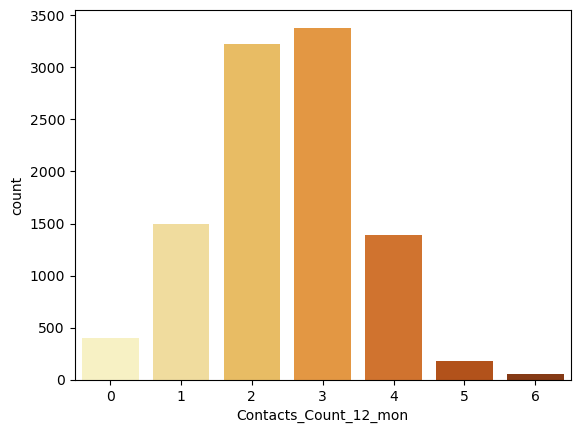

In [55]:
sns.countplot(data1.Contacts_Count_12_mon,palette='YlOrBr')

In [56]:
pd.crosstab(data1.Attrition_Flag, data1.Contacts_Count_12_mon, margins = True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Attrition_Flag,,,,,,,,
0,7,108,403,681,315,59,54,1627
1,392,1391,2824,2699,1077,117,0,8500
All,399,1499,3227,3380,1392,176,54,10127


In [57]:
data_dept_ct= np.array([[7,108,403,681,315,113],[392,1391,2824,2699,1077,117]])
scipy.stats.chi2_contingency(data_dept_ct, correction= False )

(451.2193225217652,
 2.6807335508925554e-95,
 5,
 array([[  64.10318949,  240.82877456,  518.44860275,  543.02952503,
          223.63819492,   36.95171324],
        [ 334.89681051, 1258.17122544, 2708.55139725, 2836.97047497,
         1168.36180508,  193.04828676]]))

# Credit_Limit

In [58]:
data1.Credit_Limit.value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

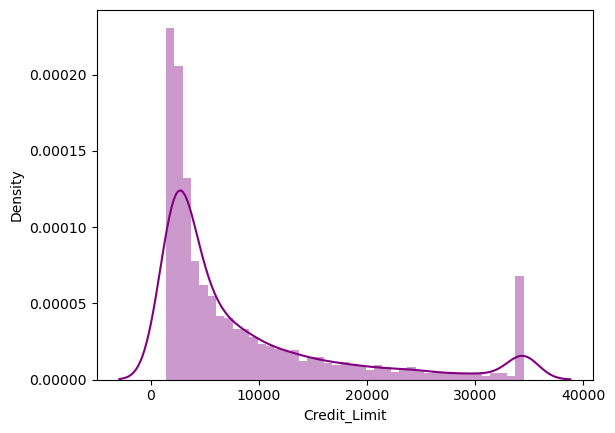

In [59]:
sns.distplot(data1.Credit_Limit,color='purple')

<AxesSubplot:xlabel='Credit_Limit'>

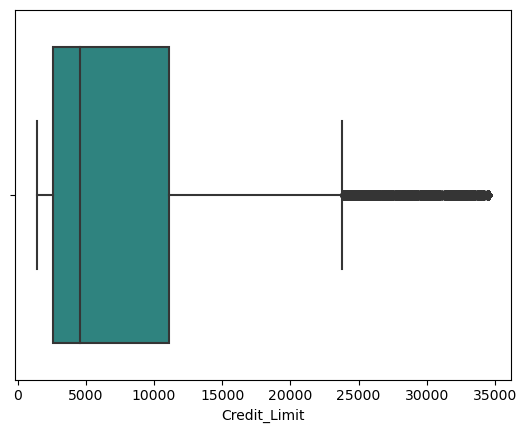

In [60]:
sns.boxplot(data1.Credit_Limit,palette='viridis')

In [61]:
Q1= data1.Credit_Limit.quantile(0.25)
Q2= data1.Credit_Limit.quantile(0.50)
Q3= data1.Credit_Limit.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)
dfdia_outliers = data1.Credit_Limit[(data1.Credit_Limit<lowerend) | (data1.Credit_Limit> upperend)]
len(data1.Credit_Limit[data1.Credit_Limit> upperend])


984

In [62]:
data1.Credit_Limit = np.where(data1.Credit_Limit>upperend ,upperend,data1.Credit_Limit)
data1.Credit_Limit= np.where(data1.Credit_Limit<lowerend ,lowerend,data1.Credit_Limit )

<AxesSubplot:xlabel='Credit_Limit'>

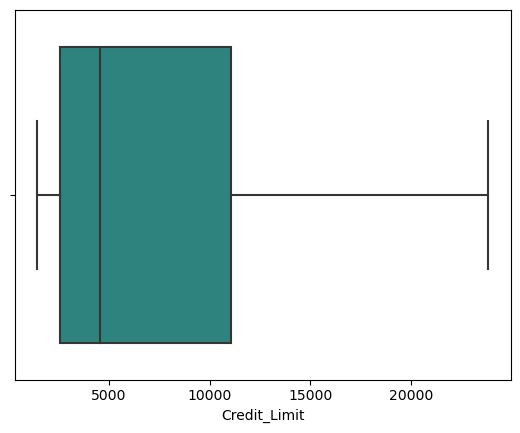

In [63]:
sns.boxplot(data1.Credit_Limit,palette='viridis')

In [64]:
model = ols("Credit_Limit~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df        sum_sq       mean_sq        F   PR(>F)
Attrition_Flag      1.0  5.156957e+08  5.156957e+08  9.90949  0.00165
Residual        10125.0  5.269112e+11  5.204062e+07      NaN      NaN


# Total_Revolving_Bal

In [65]:
data1.Total_Revolving_Bal.value_counts()

0       2470
2517     508
1965      12
1480      12
1434      11
        ... 
2467       1
2131       1
2400       1
2144       1
2241       1
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Density'>

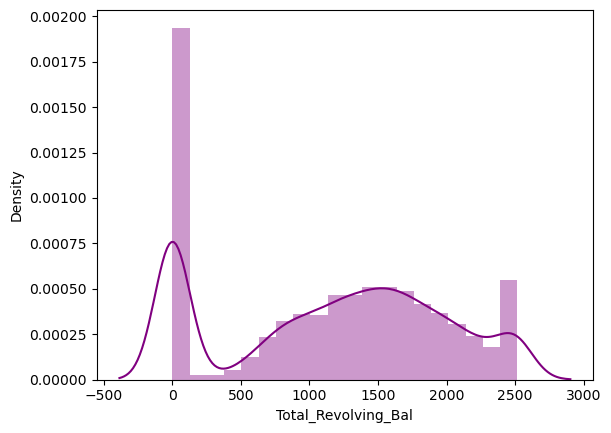

In [66]:
sns.distplot(data1.Total_Revolving_Bal,color='purple')

<AxesSubplot:xlabel='Total_Revolving_Bal'>

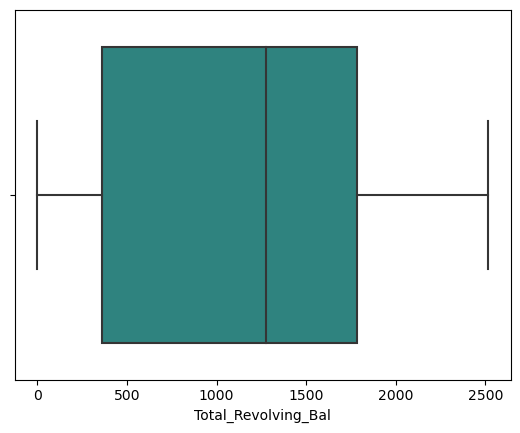

In [67]:
sns.boxplot(data1.Total_Revolving_Bal,palette='viridis')

In [68]:
model = ols("Total_Revolving_Bal~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df        sum_sq       mean_sq          F  PR(>F)
Attrition_Flag      1.0  4.653994e+08  4.653994e+08  752.70241     0.0
Residual        10125.0  6.260334e+09  6.183046e+05        NaN     NaN


# Avg_Open_To_Buy

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Density'>

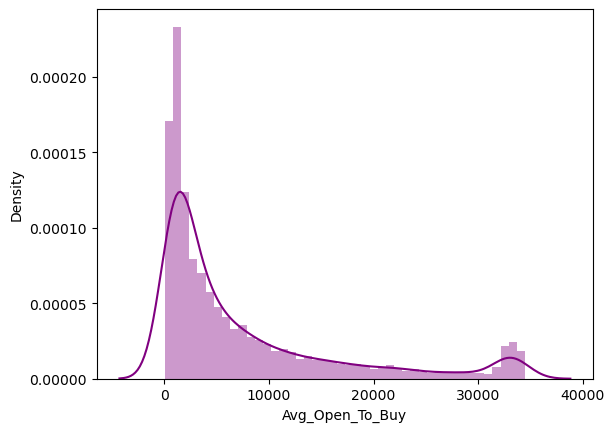

In [69]:
sns.distplot(data1.Avg_Open_To_Buy,color='purple')

<AxesSubplot:xlabel='Avg_Open_To_Buy'>

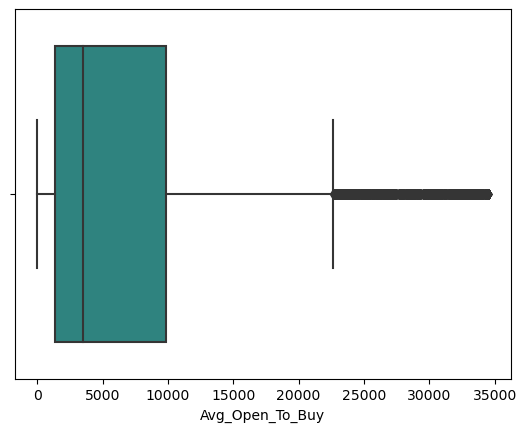

In [70]:
sns.boxplot(data1.Avg_Open_To_Buy,palette='viridis')

In [71]:
Q1= data1.Avg_Open_To_Buy .quantile(0.25)
Q2= data1.Avg_Open_To_Buy .quantile(0.50)
Q3= data1.Avg_Open_To_Buy.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data1.Avg_Open_To_Buy[(data1.Avg_Open_To_Buy < lowerend) | (data1.Avg_Open_To_Buy > upperend)]
len(data1.Avg_Open_To_Buy[data1.Avg_Open_To_Buy> upperend])

963

In [72]:
data1.Avg_Open_To_Buy = np.where(data1.Avg_Open_To_Buy>upperend ,upperend,data1.Avg_Open_To_Buy)
data1.Avg_Open_To_Buy= np.where(data1.Avg_Open_To_Buy<lowerend ,lowerend,data1.Avg_Open_To_Buy)

<AxesSubplot:xlabel='Avg_Open_To_Buy'>

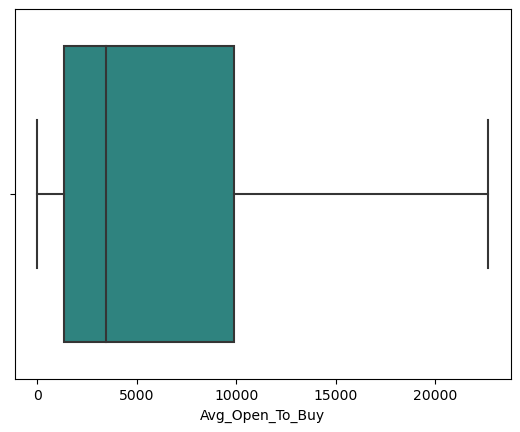

In [73]:
sns.boxplot(data1.Avg_Open_To_Buy,palette='viridis')

In [74]:
model = ols("Avg_Open_To_Buy~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df        sum_sq       mean_sq        F   PR(>F)
Attrition_Flag      1.0  1.159804e+07  1.159804e+07  0.22225  0.63734
Residual        10125.0  5.283586e+11  5.218357e+07      NaN      NaN


In [75]:
data1.drop('Avg_Open_To_Buy',axis=1,inplace=True)#because p-value is greater than 0.05

# Total_Amt_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Density'>

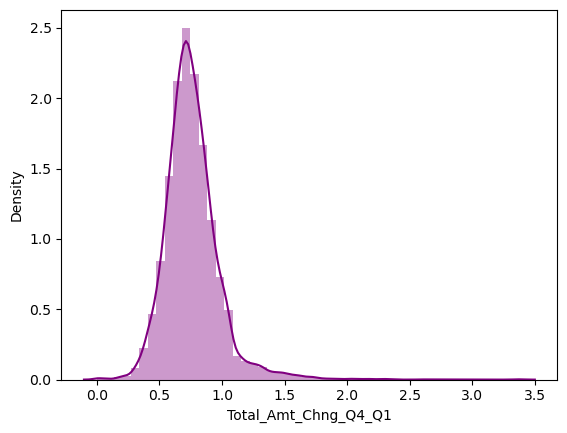

In [76]:
sns.distplot(data1.Total_Amt_Chng_Q4_Q1,color='purple')

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>

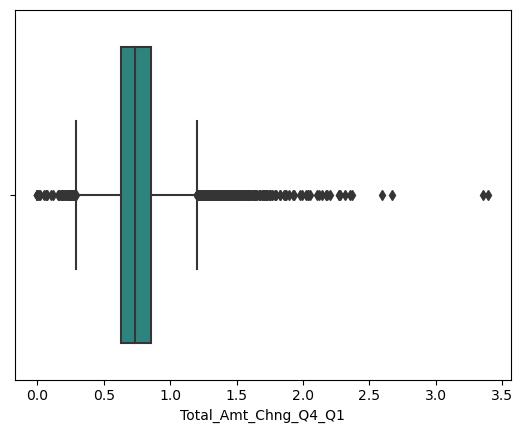

In [77]:
sns.boxplot(data1.Total_Amt_Chng_Q4_Q1,palette='viridis')

In [78]:
Q1= data1.Total_Amt_Chng_Q4_Q1 .quantile(0.25)
Q2= data1.Total_Amt_Chng_Q4_Q1 .quantile(0.50)
Q3= data1.Total_Amt_Chng_Q4_Q1.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data1.Total_Amt_Chng_Q4_Q1[(data1.Total_Amt_Chng_Q4_Q1< lowerend) | (data1.Total_Amt_Chng_Q4_Q1> upperend)]
len(data1.Total_Amt_Chng_Q4_Q1[data1.Total_Amt_Chng_Q4_Q1> upperend])

348

In [79]:
data1.Total_Amt_Chng_Q4_Q1 = np.where(data1.Total_Amt_Chng_Q4_Q1>upperend ,upperend,data1.Total_Amt_Chng_Q4_Q1)
data1.Total_Amt_Chng_Q4_Q1= np.where(data1.Total_Amt_Chng_Q4_Q1<lowerend ,lowerend,data1.Total_Amt_Chng_Q4_Q1)

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>

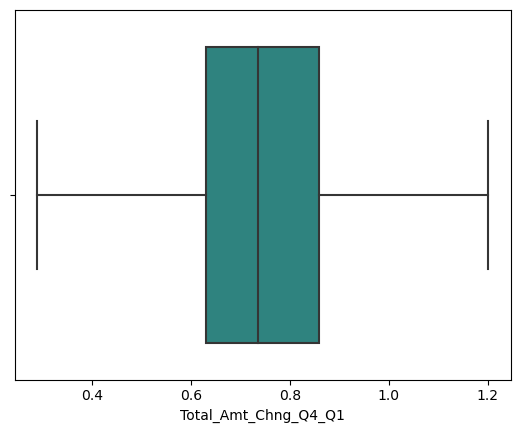

In [80]:
sns.boxplot(data1.Total_Amt_Chng_Q4_Q1,palette='viridis')

In [81]:
model = ols("Total_Amt_Chng_Q4_Q1~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df     sum_sq  mean_sq          F  PR(>F)
Attrition_Flag      1.0    5.69794  5.69794  170.10584     0.0
Residual        10125.0  339.15132  0.03350        NaN     NaN


# Total_Trans_Amt

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

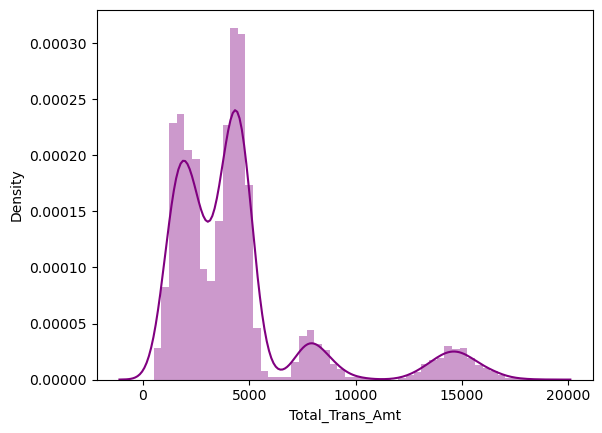

In [82]:
sns.distplot(data1.Total_Trans_Amt,color='purple')

<AxesSubplot:xlabel='Total_Trans_Amt'>

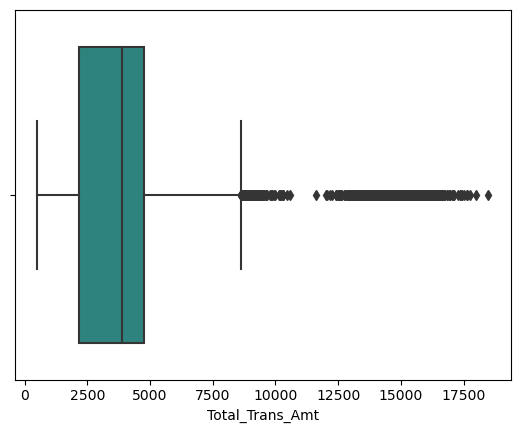

In [83]:
sns.boxplot(data1.Total_Trans_Amt,palette='viridis')

In [84]:
Q1= data1.Total_Trans_Amt .quantile(0.25)
Q2= data1.Total_Trans_Amt .quantile(0.50)
Q3= data1.Total_Trans_Amt.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data1.Total_Trans_Amt[(data1.Total_Trans_Amt< lowerend) | (data1.Total_Trans_Amt> upperend)]
len(data1.Total_Trans_Amt[data1.Total_Trans_Amt> upperend])

896

In [85]:
data1.Total_Trans_Amt = np.where(data1.Total_Trans_Amt>upperend ,upperend,data1.Total_Trans_Amt)
data1.Total_Trans_Amt= np.where(data1.Total_Trans_Amt<lowerend ,lowerend,data1.Total_Trans_Amt)

<AxesSubplot:xlabel='Total_Trans_Amt'>

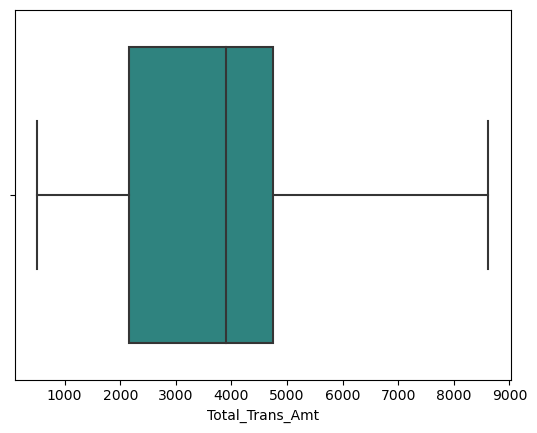

In [86]:
sns.boxplot(data1.Total_Trans_Amt,palette='viridis')

In [87]:
model = ols("Total_Trans_Amt~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df        sum_sq       mean_sq          F  PR(>F)
Attrition_Flag      1.0  1.528837e+09  1.528837e+09  337.97046     0.0
Residual        10125.0  4.580126e+10  4.523582e+06        NaN     NaN


# Total_Trans_Ct

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Density'>

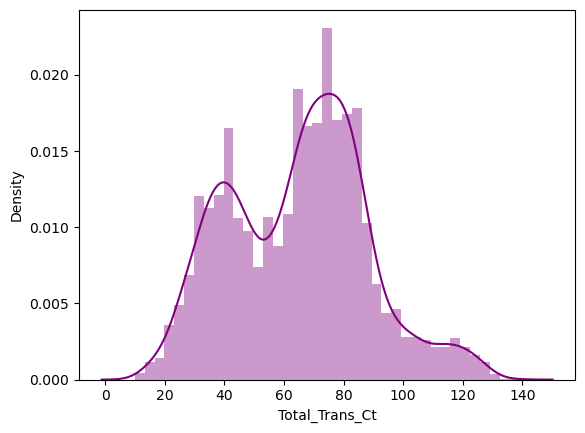

In [88]:
sns.distplot(data1.Total_Trans_Ct,color='purple')

<AxesSubplot:xlabel='Total_Trans_Ct'>

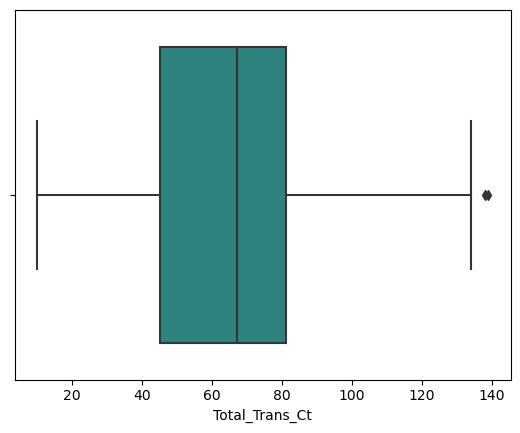

In [89]:
sns.boxplot(data1.Total_Trans_Ct,palette='viridis')

In [90]:
Q1= data1.Total_Trans_Ct .quantile(0.25)
Q2= data1.Total_Trans_Ct .quantile(0.50)
Q3= data1.Total_Trans_Ct.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data1.Total_Trans_Ct[(data1.Total_Trans_Ct< lowerend) | (data1.Total_Trans_Ct> upperend)]
len(data1.Total_Trans_Ct[data1.Total_Trans_Ct> upperend])

2

<AxesSubplot:xlabel='Total_Trans_Ct'>

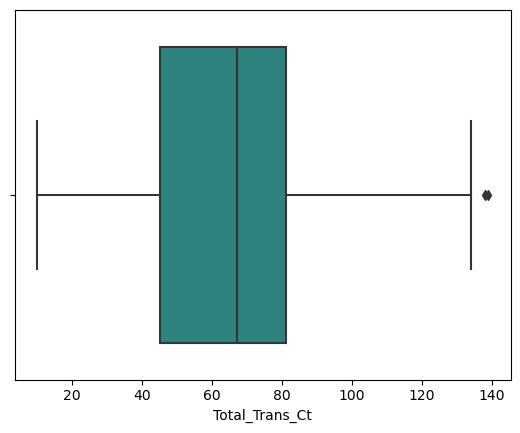

In [91]:
sns.boxplot(data1.Total_Trans_Ct,palette='viridis')

In [92]:
data1.Total_Trans_Ct = np.where(data1.Total_Trans_Ct>upperend ,upperend,data1.Total_Trans_Ct)
data1.Total_Trans_Ct= np.where(data1.Total_Trans_Ct<lowerend ,lowerend,data1.Total_Trans_Ct)

<AxesSubplot:xlabel='Total_Trans_Ct'>

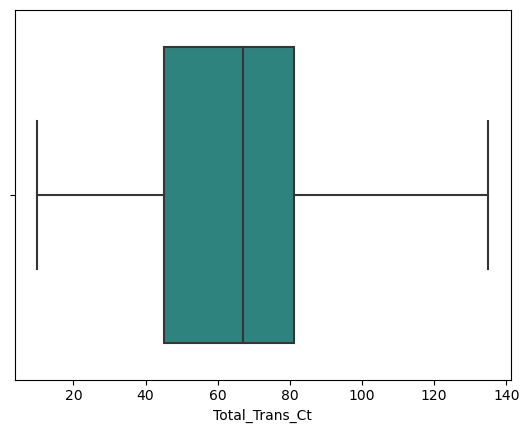

In [93]:
sns.boxplot(data1.Total_Trans_Ct,palette='viridis')

In [94]:
model = ols("Total_Trans_Ct~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df        sum_sq       mean_sq           F  PR(>F)
Attrition_Flag      1.0  7.695188e+05  769518.75432  1620.33056     0.0
Residual        10125.0  4.808511e+06     474.91467         NaN     NaN


# Total_Ct_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Density'>

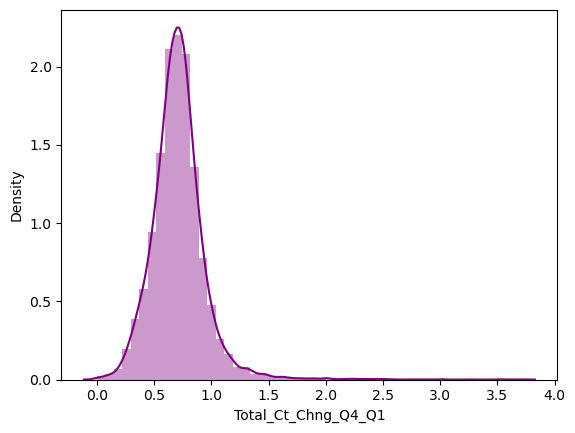

In [95]:
sns.distplot(data1.Total_Ct_Chng_Q4_Q1,color='purple')

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1'>

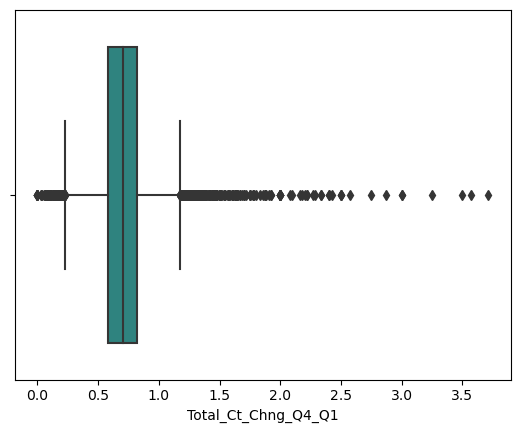

In [96]:
sns.boxplot(data1.Total_Ct_Chng_Q4_Q1,palette='viridis')

In [97]:
Q1= data1.Total_Ct_Chng_Q4_Q1 .quantile(0.25)
Q2= data1.Total_Ct_Chng_Q4_Q1.quantile(0.50)
Q3= data1.Total_Ct_Chng_Q4_Q1.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers = data1.Total_Ct_Chng_Q4_Q1[(data1.Total_Ct_Chng_Q4_Q1< lowerend) | (data1.Total_Ct_Chng_Q4_Q1> upperend)]
len(data1.Total_Ct_Chng_Q4_Q1[data1.Total_Ct_Chng_Q4_Q1> upperend])

298

In [98]:
data1.Total_Ct_Chng_Q4_Q1 = np.where(data1.Total_Ct_Chng_Q4_Q1>upperend ,upperend,data1.Total_Ct_Chng_Q4_Q1)
data1.Total_Ct_Chng_Q4_Q1= np.where(data1.Total_Ct_Chng_Q4_Q1<lowerend ,lowerend,data1.Total_Ct_Chng_Q4_Q1)

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1'>

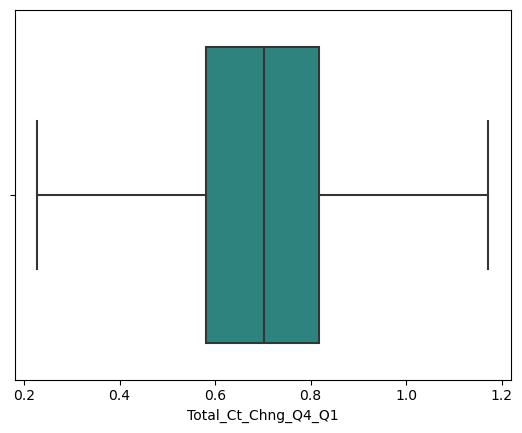

In [99]:
sns.boxplot(data1.Total_Ct_Chng_Q4_Q1,palette='viridis')

In [100]:
model = ols("Total_Ct_Chng_Q4_Q1~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df     sum_sq   mean_sq           F  PR(>F)
Attrition_Flag      1.0   42.16900  42.16900  1214.25778     0.0
Residual        10125.0  351.62311   0.03473         NaN     NaN


# Avg_Utilization_Ratio

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Density'>

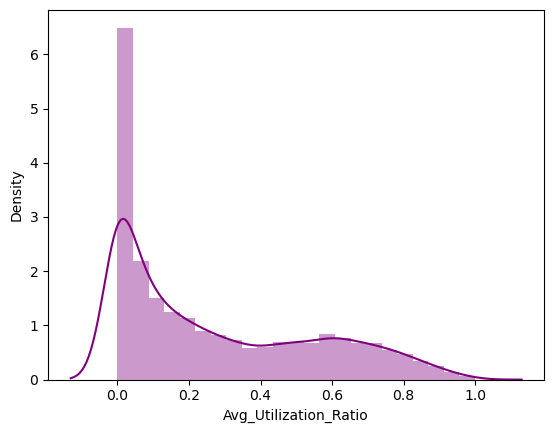

In [101]:
sns.distplot(data1.Avg_Utilization_Ratio,color='purple')

<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

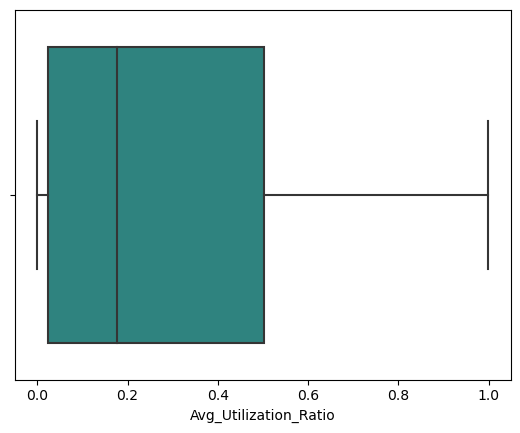

In [102]:
sns.boxplot(data1.Avg_Utilization_Ratio,palette='viridis')

In [103]:
model = ols("Avg_Utilization_Ratio~Attrition_Flag", data1).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

                     df     sum_sq   mean_sq         F  PR(>F)
Attrition_Flag      1.0   24.49766  24.49766  332.8768     0.0
Residual        10125.0  745.13693   0.07359       NaN     NaN


# Gender

In [104]:
data1.Gender.value_counts()#orinal variable

0    5358
1    4769
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

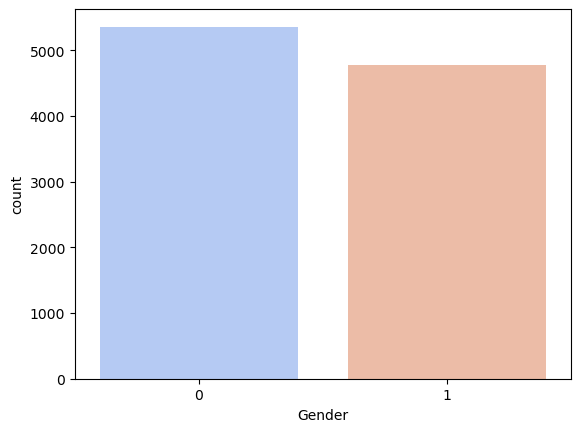

In [105]:
sns.countplot(data1.Gender,palette='coolwarm')


In [106]:
a=pd.crosstab(data.Gender,data1.Attrition_Flag)
chi2_contingency(a)[1]

0.00019635846717310307

# Education_Level

In [107]:
data1.Education_Level.value_counts()

2    3128
3    2013
6    1519
5    1487
0    1013
4     516
1     451
Name: Education_Level, dtype: int64

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

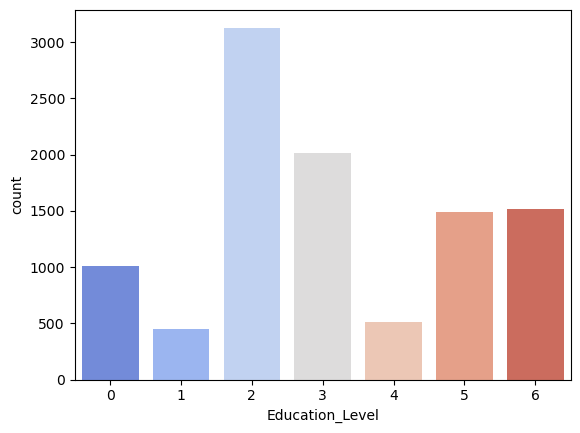

In [108]:
sns.countplot(data1.Education_Level,palette='coolwarm')

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

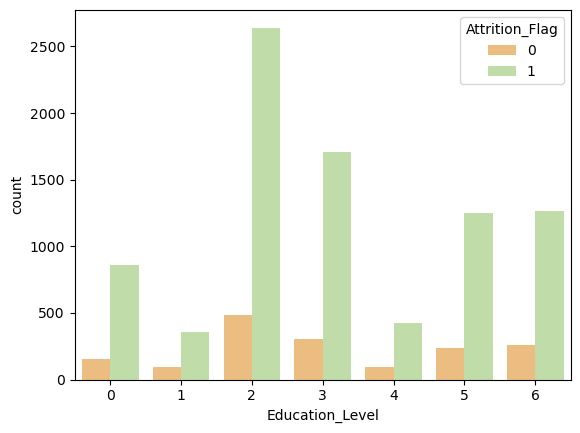

In [109]:
sns.countplot(x='Education_Level',hue='Attrition_Flag',data=data1,palette='Spectral')

In [110]:
a=pd.crosstab(data1.Education_Level,data1.Attrition_Flag)
chi2_contingency(a)[1]

0.05148913147336634

In [111]:
data1.drop('Education_Level',inplace=True,axis=1)#because p-value is greater than 0.05

In [112]:
data1.Marital_Status.value_counts()

1    4687
2    3943
3     749
0     748
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

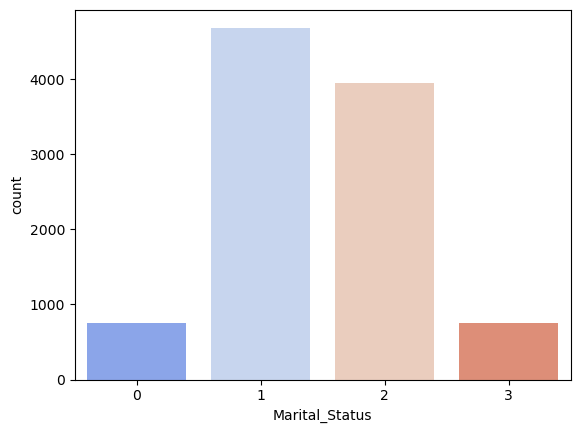

In [113]:
sns.countplot(data1.Marital_Status,palette='coolwarm')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

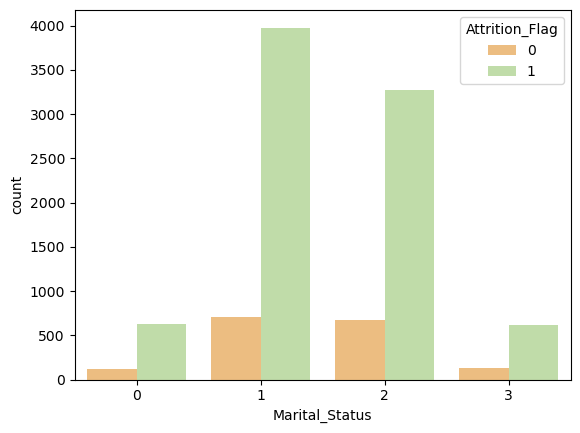

In [114]:
sns.countplot(x='Marital_Status',hue='Attrition_Flag',data=data1,palette='Spectral')

In [115]:
a=pd.crosstab(data1.Marital_Status,data1.Attrition_Flag)
chi2_contingency(a)[1]

0.10891263394840227

In [116]:
data1.drop('Marital_Status',inplace=True,axis=1)#because p-value is greater than 0.05

# Income_Category

In [117]:
data1.Income_Category.value_counts()

4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

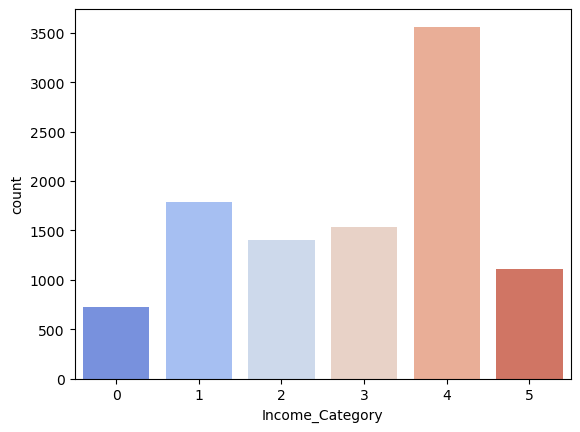

In [118]:
sns.countplot(data1.Income_Category,palette='coolwarm')

In [119]:
a=pd.crosstab(data1.Income_Category,data1.Attrition_Flag)
chi2_contingency(a)[1]

0.025002425704390617

# Card_Category

In [120]:
data1.Card_Category.value_counts()

0    9436
3     555
1     116
2      20
Name: Card_Category, dtype: int64

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

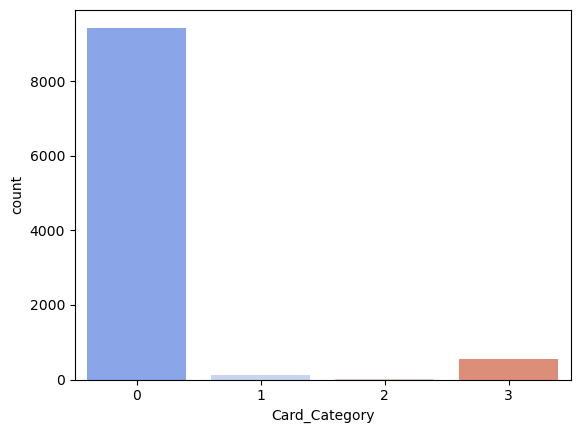

In [121]:
sns.countplot(data1.Card_Category,palette='coolwarm')

In [122]:
a=pd.crosstab(data1.Card_Category,data1.Attrition_Flag)
chi2_contingency(a)[1]

0.5252382797994759

In [123]:
data1.drop('Card_Category',inplace=True,axis=1)#because p-value is greater than 0.05

In [124]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Gender                    10127 non-null  int32  
 2   Income_Category           10127 non-null  int32  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 9   Total_Trans_Amt           10127 non-null  float64
 10  Total_Trans_Ct            10127 non-null  float64
 11  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 12  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(6), int32(3), int64(4)
memory usage: 910.0 KB


<AxesSubplot:>

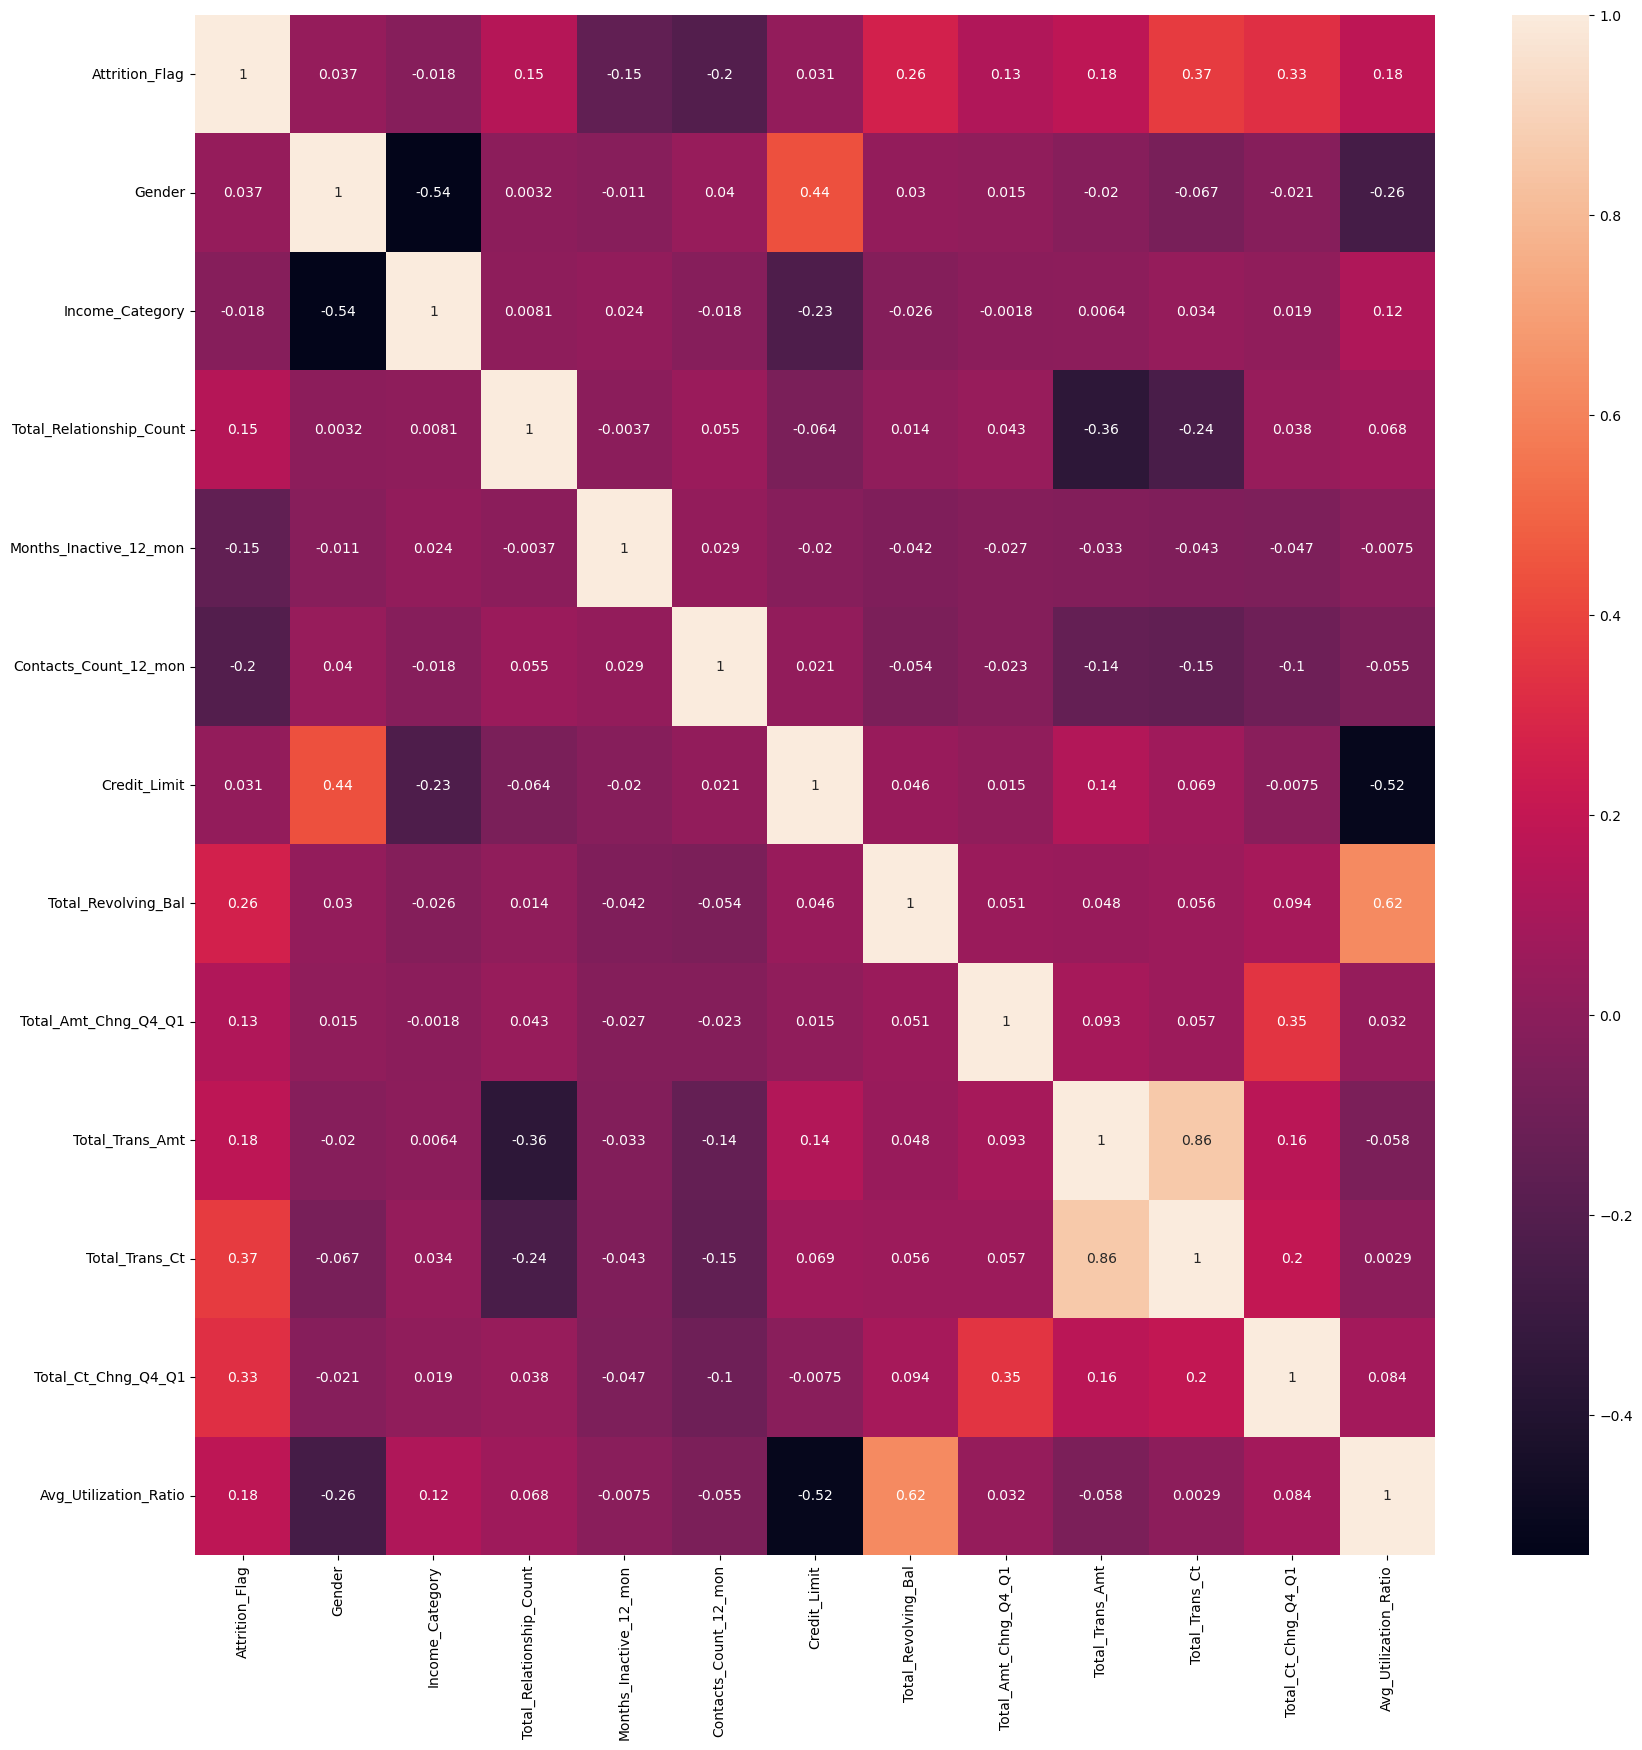

In [125]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True)

In [126]:
num_col=data1.select_dtypes(include=np.number)
num_col.shape


(10127, 13)

In [127]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Gender                    10127 non-null  int32  
 2   Income_Category           10127 non-null  int32  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 9   Total_Trans_Amt           10127 non-null  float64
 10  Total_Trans_Ct            10127 non-null  float64
 11  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 12  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(6), int32(3), int64(4)
memory usage: 910.0 KB


#### VIF

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
x=data1.iloc[:,[3,4,5,10,11,12,6,7,8,9,]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

                     feature        VIF
0   Total_Relationship_Count   1.185031
1     Months_Inactive_12_mon   1.006057
2      Contacts_Count_12_mon   1.033824
3             Total_Trans_Ct   4.071466
4        Total_Ct_Chng_Q4_Q1   1.200389
5      Avg_Utilization_Ratio   3.241382
6               Credit_Limit   1.989854
7        Total_Revolving_Bal   2.373376
8       Total_Amt_Chng_Q4_Q1   1.152803
9            Total_Trans_Amt   4.410925
10                 intersept  53.456613


In [130]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Gender                    10127 non-null  int32  
 2   Income_Category           10127 non-null  int32  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 9   Total_Trans_Amt           10127 non-null  float64
 10  Total_Trans_Ct            10127 non-null  float64
 11  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 12  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(6), int32(3), int64(4)
memory usage: 910.0 KB


In [131]:
data1.head()

,Attrition_Flag,Gender,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,2,5,1,3,12691.0,777,1.201,1144.0,42.0,1.172,0.061
1,1,0,4,6,1,2,8256.0,864,1.201,1291.0,33.0,1.172,0.105
2,1,1,3,4,1,0,3418.0,0,1.201,1887.0,20.0,1.172,0.000
3,1,0,4,3,4,1,3313.0,2517,1.201,1171.0,20.0,1.172,0.760
4,1,1,2,5,1,0,4716.0,0,1.201,816.0,28.0,1.172,0.000


In [132]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Gender                    10127 non-null  int32  
 2   Income_Category           10127 non-null  int32  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 9   Total_Trans_Amt           10127 non-null  float64
 10  Total_Trans_Ct            10127 non-null  float64
 11  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 12  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(6), int32(3), int64(4)
memory usage: 910.0 KB


In [133]:
x = data1.drop("Attrition_Flag",axis = 1)
y = data1["Attrition_Flag"]

In [134]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20, stratify=y)

In [135]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [136]:
p_x=lr.predict(xtest)

In [137]:
statistc_model_Logistic_Regression=accuracy_score(ytest,p_x)
statistc_model_Logistic_Regression

0.8937150378413952

# Smote

In [138]:
data1.Attrition_Flag.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [139]:
no=data1[data1.Attrition_Flag==0]
yes=data1[data1.Attrition_Flag==1]

from sklearn.utils import resample

over=resample(no,replace=True,n_samples=len(yes),random_state=23)

datasmote=pd.concat([yes,over])
datasmote.Attrition_Flag.value_counts()

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

In [140]:
datasmote

,Attrition_Flag,Gender,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,2,5,1,3,12691.0,777,1.201,1144.0,42.0,1.172,0.061
1,1,0,4,6,1,2,8256.0,864,1.201,1291.0,33.0,1.172,0.105
2,1,1,3,4,1,0,3418.0,0,1.201,1887.0,20.0,1.172,0.000
3,1,0,4,3,4,1,3313.0,2517,1.201,1171.0,20.0,1.172,0.760
4,1,1,2,5,1,0,4716.0,0,1.201,816.0,28.0,1.172,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,1,1,3,1,3,7758.0,1408,0.365,569.0,23.0,0.643,0.181
2785,0,1,1,2,6,4,2381.0,651,0.592,1920.0,46.0,0.586,0.273
9277,0,1,1,1,4,3,7979.0,0,0.465,5056.0,63.0,0.853,0.000
1477,0,0,4,1,2,1,1890.0,666,0.691,1483.0,36.0,0.500,0.352


### Data Preprocessing

In [141]:
x = datasmote.drop("Attrition_Flag",axis = 1)
y =  datasmote["Attrition_Flag"]

### Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [143]:
p_x=lr.predict(xtest)

In [144]:
smote_base_model_Logistic_Regression_=accuracy_score(ytest,p_x)
smote_base_model_Logistic_Regression_

0.8937150378413952

In [145]:
print(metrics.classification_report(ytest, p_x, labels = [0,1,2]))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       488
           1       0.91      0.97      0.94      2551
           2       0.00      0.00      0.00         0

   micro avg       0.89      0.89      0.89      3039
   macro avg       0.55      0.49      0.52      3039
weighted avg       0.89      0.89      0.89      3039



In [146]:
print(metrics.confusion_matrix(ytest, p_x))

[[ 253  235]
 [  88 2463]]


# RandomForest

In [147]:
x = data.drop("Attrition_Flag",axis = 1)
y = data["Attrition_Flag"]

In [148]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20, stratify=y)

In [149]:
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [150]:
params={
    'n_estimators':[800,900,1000.1100],
    'max_features':['sqrt',0.25],
    'min_samples_split':[2,4,6]
}

In [151]:
gd=GridSearchCV(rf,params)

In [152]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=30),
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [800, 900, 1000.11]})

In [153]:
b=gd.best_estimator_
b

RandomForestClassifier(max_features='sqrt', n_estimators=800, random_state=30)

In [154]:
rf=RandomForestClassifier(n_estimators=1000)

In [155]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [156]:
y_pred_rand=rf.predict(xtest)

In [157]:
confusion_matrix(ytest,y_pred_rand)

array([[ 398,   90],
       [  27, 2524]], dtype=int64)

In [158]:
grid_search_acc=accuracy_score(ytest,y_pred_rand)
grid_search_acc

0.9615004935834156

In [159]:
print(classification_report(ytest,y_pred_rand))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       488
           1       0.97      0.99      0.98      2551

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [160]:
prob=rf.predict_proba(xtest)
prob

array([[0.027, 0.973],
       [0.009, 0.991],
       [0.807, 0.193],
       ...,
       [0.016, 0.984],
       [0.851, 0.149],
       [0.759, 0.241]])

In [161]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9887544100352803


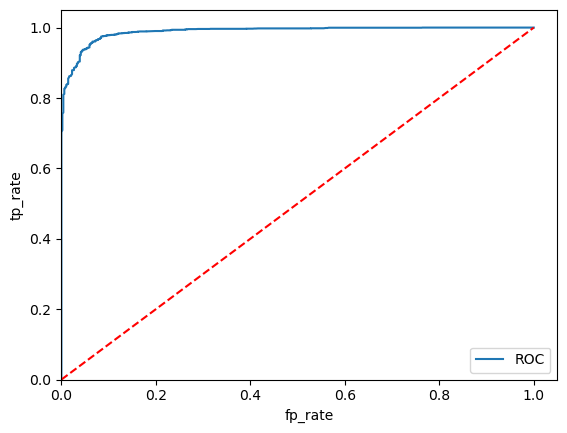

In [162]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()


In [163]:
#random search
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [164]:
params={
    'n_estimators':[800,900,1000.1100],
    'max_features':['log2',0.25],
    'min_samples_split':[2,4,6]
}

In [165]:
gd=RandomizedSearchCV(rf,params)

In [166]:
gd.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_features': ['log2', 0.25],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [800, 900, 1000.11]})

In [167]:
b=gd.best_estimator_
b

RandomForestClassifier(max_features=0.25, n_estimators=800, random_state=30)

In [168]:
rf=RandomForestClassifier(n_estimators=1000)

In [169]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [170]:
y_pred_rand=rf.predict(xtest)

In [171]:
confusion_matrix(ytest,y_pred_rand)

array([[ 394,   94],
       [  28, 2523]], dtype=int64)

In [172]:
random_search_acc=accuracy_score(ytest,y_pred_rand)
random_search_acc

0.9598552155314248

# DecisionTree

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
dt=DecisionTreeClassifier(random_state=20)

In [175]:
parm={'max_depth':[10,20,30]}

In [176]:
grid=GridSearchCV(dt,parm)

In [177]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_depth': [10, 20, 30]})

In [178]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, random_state=20)

In [179]:
dt=DecisionTreeClassifier(max_depth=20, random_state=20)

In [180]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=20, random_state=20)

In [181]:
y_pred_dec=dt.predict(xtest)

In [182]:
confusion_matrix(ytest,y_pred_dec)

array([[ 386,  102],
       [  74, 2477]], dtype=int64)

In [183]:
decision_tree_acc=accuracy_score(ytest,y_pred_dec)
decision_tree_acc

0.9420862125699243

In [184]:
#classification Report
print(classification_report(ytest,y_pred_dec))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       488
           1       0.96      0.97      0.97      2551

    accuracy                           0.94      3039
   macro avg       0.90      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039



# SVM

In [185]:
from sklearn.svm import SVC
from sklearn import svm

In [186]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced',probability=True) 
td_svc = svc.fit(xtrain,ytrain)
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [187]:
y_pred_lin = td_svc.predict(xtest)
len(y_pred_lin)

3039

In [188]:
svm_acc=accuracy_score(ytest,y_pred_lin)
svm_acc

0.7291872326423166

In [189]:
print(confusion_matrix(ytest,y_pred_lin))


[[ 357  131]
 [ 692 1859]]


In [190]:
print(classification_report(ytest,y_pred_lin))

              precision    recall  f1-score   support

           0       0.34      0.73      0.46       488
           1       0.93      0.73      0.82      2551

    accuracy                           0.73      3039
   macro avg       0.64      0.73      0.64      3039
weighted avg       0.84      0.73      0.76      3039



# KNN

In [191]:
params={'n_neighbors':np.arange(1,40,1)}

In [192]:
gd.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_features': ['log2', 0.25],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [800, 900, 1000.11]})

In [193]:
gd.best_params_

{'n_estimators': 800, 'min_samples_split': 2, 'max_features': 0.25}

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
knn=KNeighborsClassifier(n_neighbors=1000,algorithm='ball_tree')
knn.fit(xtrain,ytrain)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1000)

In [196]:
y_pred_knn=knn.predict(xtest)

In [197]:
#accuracy score
knn_ball_tree_acc=accuracy_score(ytest,y_pred_knn)
knn_ball_tree_acc

0.8394208621256992

In [198]:
print(classification_report(ytest,y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       488
           1       0.84      1.00      0.91      2551

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.77      3039



In [199]:
confusion_matrix(ytest,y_pred_knn)

array([[   0,  488],
       [   0, 2551]], dtype=int64)

In [200]:
knn=KNeighborsClassifier(n_neighbors=1100,algorithm='kd_tree')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1100)

In [201]:
y_pred_knn=knn.predict(xtest)

In [202]:
knn_kd_tree_acc=accuracy_score(ytest,y_pred_knn)
knn_kd_tree_acc

0.8394208621256992

# Naive Bayes

In [203]:
from  sklearn.naive_bayes import GaussianNB

In [204]:
gn=GaussianNB()

In [205]:
gn.fit(xtrain,ytrain)

GaussianNB()

In [206]:
y_pred_nb=gn.predict(xtest)

In [207]:
naive_bayes_acc=accuracy_score(ytest,y_pred_nb)
naive_bayes_acc

0.8914116485686081

In [208]:
print('Accuracy for Logistic regression Base model:',base_model_logistic_regression*100)
print('Accuracy for Logistic regression statistical method:',statistc_model_Logistic_Regression*100)
print('Accuracy for Logistic regression Smote:',smote_base_model_Logistic_Regression_*100)
print('Accuracy for Decision_tree method:',decision_tree_acc*100)
print('Accuracy for Random forest_Gridsearch method:',grid_search_acc*100)
print('Accuracy for Random forest_Randomsearch:',random_search_acc*100)
print('Accuracy for Naive_Bayes_classifier:', naive_bayes_acc*100)
print('Accuracy for KNN kd tree:',knn_kd_tree_acc*100)
print('Accuracy for KNN ball tree:',knn_ball_tree_acc*100)
print('Accuracy for SVM:',svm_acc*100)


Accuracy for Logistic regression Base model: 87.59460348798947
Accuracy for Logistic regression statistical method: 89.37150378413952
Accuracy for Logistic regression Smote: 89.37150378413952
Accuracy for Decision_tree method: 94.20862125699243
Accuracy for Random forest_Gridsearch method: 96.15004935834156
Accuracy for Random forest_Randomsearch: 95.98552155314249
Accuracy for Naive_Bayes_classifier: 89.14116485686081
Accuracy for KNN kd tree: 83.94208621256992
Accuracy for KNN ball tree: 83.94208621256992
Accuracy for SVM: 72.91872326423166
